In [4]:
!pip install --upgrade tables
!pip install eli5

     |████████████████████████████████| 4.3MB 3.4MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
     |████████████████████████████████| 112kB 3.4MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as me
from sklearn.model_selection import cross_val_score
import eli5
from eli5.sklearn import PermutationImportance

#Funkcje






In [0]:
def group_and_barplot(feat_groupby, feat_agg = 'price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort = 'mean', top = 50, subplots=True):
  return (
    df
    .groupby(feat_groupby)[feat_agg]
    .agg(agg_funcs)
    .sort_values(by = feat_sort,ascending=False)
    .head(top)
  ).plot(kind='bar', figsize=(15,5), subplots=subplots)

#Wczytywanie danych

In [9]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_Car"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_Car


In [0]:
df = pd.read_hdf("data/car.h5")

In [11]:
df.shape

(106494, 155)

In [12]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

Dummy model

In [13]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [0]:
X = df[['car_id']].values
y = df['price_value'].values

model = DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)

In [16]:
me(y, y_pred)

39465.934630440985

In [17]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [20]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [21]:
df = df[df['price_currency'] != 'EUR']
df.shape

(106290, 155)

#Features

In [0]:
SUFFIX_CAT = '__cat'
for feat in df.columns:
  if isinstance(df[feat][0], list): continue

  factorized_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat] = factorized_values
  else:
    df[feat + SUFFIX_CAT] = df[feat].factorize()[0]

In [0]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]


In [0]:
cat_feats = [x for x in cat_feats if 'price' not in x]

In [38]:
len(cat_feats)

151

In [0]:
X = df[cat_feats].values
y = df['price_value'].values

In [0]:
model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')

In [41]:
np.mean(scores)

-19566.588937368324

In [43]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(X,y)

imp = PermutationImportance(m, random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names = cat_feats)

Weight,Feature
0.2533 ± 0.0040,param_napęd__cat
0.2008 ± 0.0047,param_faktura-vat__cat
0.1943 ± 0.0088,param_stan__cat
0.1423 ± 0.0086,param_rok-produkcji__cat
0.0629 ± 0.0047,param_moc__cat
0.0424 ± 0.0014,feature_kamera-cofania__cat
0.0412 ± 0.0008,param_skrzynia-biegów__cat
0.0286 ± 0.0037,param_marka-pojazdu__cat
0.0191 ± 0.0022,param_pojemność-skokowa__cat
0.0163 ± 0.0005,feature_bluetooth__cat


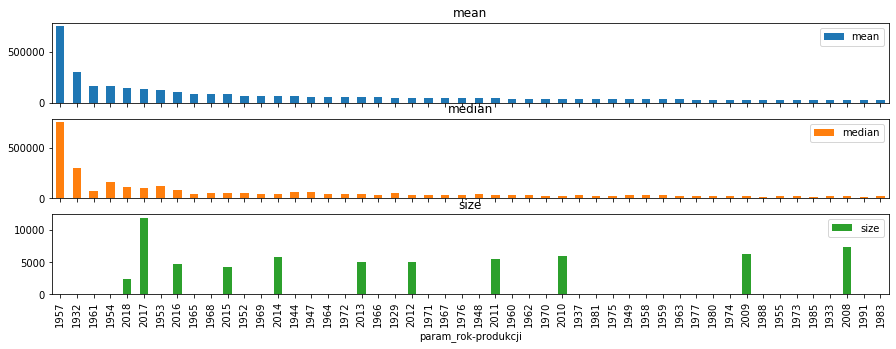

In [48]:
group_and_barplot('param_rok-produkcji');

In [49]:
ls

data/  day2_visualization.ipynb  Day3_simple_model.ipynb  LICENSE  README.md


In [0]:
!git add Day3_simple_model.ipynb
!git commit -m "add visualisation"